W. Blake Cannon | wblakecannon@gmail.com | https://github.com/wblakecannon/titanic-investigation | 9-Aug-2017

#  Analysis of Titanic Passenger Data

This study is an excersize to show how to use foundations of Data Science in order to import, study, visualize, and present the raw data in a method that is easy for any user to digest and understand.

This study uses passenger data from the ill-fated maiden voyage of the RMS Titanic (1912). The data (and explanation of the data) can be obtained from: https://www.kaggle.com/c/titanic/data

First, the raw comma separated values (.cvs) data will be loaded into a Python (Pandas) dataframe.

Second, there will be some data exploration. This will be completed mostly by loading plots of different data slices in order to better understand the data with visualization.  Visualizing the data makes generating a hypothesis easier.

Third, the data will be analyzed.

Lastly, a function has been created where a user can input their personal information to see their chances of surviving the Titanic disaster.

**Note:** This is a Jupyter iPython Notebook. It allows code to be written, code output to be displayed, and also markup. It allows the analysis to be conducted and displayed. Comments that are intended for a general audience are presented in markup 'plain' text below each code segment. Comments that have to do with how the code works are above the code with a leading hashtag(#). However, due to the heavy display of Python code; it is not suitable for all audiencees. For example, if I were presenting my analysis to upper management, board of directors, a general audience, etc. I would not use this Notebook. I'd have much of the output in a PowerPoint type presentation. However, I would have the Jupyter Notebook available as a supplement, in case anyone wanted to see the code. Or, more importantly, the amount of work it took to create the pretty graphics.

## Questions...  Answered... With Data

The question in this study is 'What factors contributed to a survivors likelihood of surviving the Titanic disaster?'

## 1. Loading and Inspecting the Titanic Data

In [1]:
# Set AutoSave to 3 minutes
%autosave 180
# Import modules used in the analysis
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
#matplotlib.style.use('seaborn-paper')

Autosaving every 180 seconds
Populating the interactive namespace from numpy and matplotlib


In [2]:
# The following code reads all the Titanic data into Pandas DataFrames
# empty data will be filled in as NaN
# The explanation of the data can be found:
# https://www.kaggle.com/c/titanic/data
titanic_df = pd.read_csv('titanic-data.csv', keep_default_na=True)
# Set index as PassengerId
titanic_df.set_index(['PassengerId'], inplace=True)

In [3]:
# Return shape to see how much data is being worked with
titanic_df.shape

(891, 11)

In [4]:
# Show counts and data types for all columns
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The first thing that caught my eye when running the .info function is that not every passenger has a value for cabin and age. 

Another thing that the .shape and .describe functions above indicate is that there are only 891 passengers in this dataset. According to the Wikipedia article on the titanic, the capacity figures are as follows:

Passengers: 2,435 | Crew: 892 | Total: 3,327 (or 3,547 according to other sources)

So, it looks like the dataset is not complete. Perhaps it is a sample, perhaps it is incomplete. We are not sure, but we will continue on.

In [5]:
# Inspect the data with .head
titanic_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The .head function gives us a preview of the data without having to load the entire dataset. It shows all the 'columns' of data for each passenger 'row'. As we saw above, we know that there was both passengers and crew on the titanic. Since this dataset includes  a column for 'Pclass', 'Ticket',  'Fare', and 'Cabin'; we can assume that this dataset only includes true **passengers** of the Titanic. It does not include crew.

In [6]:
# Get some quick and dirty statistics with pd.describe
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The pd.describe function will give lots of information that will most likely be needed later. So we'll pd.describe across the dataset. Some of this information is basically jiberish because it makes no sense to have something like a mean of unique passenger IDs (all unique) or survivalship (boolean).

## 2. Cleaning Data and Dealing With Missing Data

In this section, we'll assess if the data needs to be cleaned. The data will be cleaned if decided it will be beneficial to the analysis. First, let's see what columns are missing data, how many missing values are missing, and what percent of the column has missing data.

This will give us an idea of not only the number of missing values; but also the significance of this number of missing data.

In [7]:
# Find how many missing values and percentage missing in each column
print 'Missing data in each Titanic dataframe column:'
for c in titanic_df.columns:
    missing_data = len(titanic_df) - titanic_df[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(titanic_df))) * 
                                                                   100, 3)), '% of total'

Missing data in each Titanic dataframe column:
Age : 177 missing values is 19.865 % of total
Cabin : 687 missing values is 77.104 % of total
Embarked : 2 missing values is 0.224 % of total


We can see that in this particular data set, there is a huge number of passeners missing cabin data, and a fairly high amount of passengers with missing age data. There are very few passengers with missing Port of Embarkation Data.

There are a number of methods that can be used to deal with this. Each has their pros and cons.
1. Drop value: This approach is acceptable if there isn't much data with missing variables.
2. Assign a value that shows data is missing: This approach could be appropriate for categories like Passenger Class and Cabin, as those are categorial variables. It wouldn't make much sense to do this on numeric data like age or fare.
2. Fill in age data by assigning a mean/median/mode value.
3. Somehow predict the missing ages by using other passenger data fields.

### 2.1. Cleaning Port of Embarkation

In [8]:
# Fill empty/NaN Embark values with most common Embark value
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(value=(titanic_df['Embarked'].value_counts().idxmax()))
# Replace Embarked letter with port name
titanic_df['Embarked'] = titanic_df['Embarked'].replace(['C'], 'Cherbourg')
titanic_df['Embarked'] = titanic_df['Embarked'].replace(['Q'], 'Queenstown')
titanic_df['Embarked'] = titanic_df['Embarked'].replace(['S'], 'Southampton')
# Print unique passenger titles and their counts
titanic_df['Embarked'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

Since so few passengers were missing Port of Embarkation data; the few missing values were simply replaced with the most common value in the column.

I also replaced the letter designating the port to the actual name of the port. (C = Cherbourg, Q = Queenstown, S = Southampton)

### 2.2. Cleaning Cabin

There's a huge amount of cabin data missing. We are also not yet sure of it's signifigance to surving the Titanic. Before we go about replacing missing Cabin data; let's take a look at what the Cabin data looks like:

In [9]:
# Print unique values in Cabin column
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

It appears that a Cabin on the Titanic starts with a letter and is followed by an integer. A bit of research on Titanic cabin letter indicate the deck.

Note that some passengers had multiple entries for their Cabin. These people had multiple cabins because of a large group or family. We can see by printing the unique Cabin numbers of passengers, all but one entry with multiple cabin entries had all cabins on the same deck, and adjacent to eachother on the same side of the Titanic.

I have a hunch that the deck a passenger was assigned to could have some impact on a passenger's overall survival. So, I will separate out this information.

In [10]:
# Take the first character from the Cabin colum and use that as value for new 'Deck' column
titanic_df['Deck'] = titanic_df['Cabin'].astype(str).str[0]
# Replace the 'n' character leftover from Pandas NaN (not a number) and make those ? to identify as missing
titanic_df['Deck'] = titanic_df['Deck'].replace('n', '?')

I want to leave the original 'Cabin' column alone in case I need to visit it later, but need to get the 'Deck' information assigned to each passenger. First, to separate out the Deck each passenger is on, I created a new column in the Pandas dataframe called 'Deck'. I then took the first character from the 'Cabin' column. Also, since the 'N' character from Pandas 'Not a Number' value copies over, the 'n' value needed to be replaced.

We are also not yet sure of it's signifigance to surving the Titanic. So, at this point in the analysis; we'll assign a value (?) to the missing Cabin data that shows us the value is missing. Later on, the fact that this information is missing could be found significant. 

### 2.3. Cleaning Name (Title)

The 'Name' column in the titanic dataframe appears to give __every__ single passenger a title of some kind. This 'title' may become important later on, so let's create a new column that just holds a passenger's title.

In [11]:
# Split passenger titles in Name category and place in new 'TitleF' column
titanic_df['TitleF'] = titanic_df['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
# Print unique passenger titles and their counts
titanic_df['TitleF'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: TitleF, dtype: int64

Now that the titles derived from the passenger names have been printed and plotted; we can see there's quite a bit of them. Some of them are standard types of titles; but some are obscure and few are rare. Let's investigate these's obscure titles and see if they correlate with passenger sex:

In [12]:
# Are the titles Sex specific?
pd.crosstab(titanic_df['TitleF'], titanic_df['Sex'])

Sex,female,male
TitleF,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


It would be best if we could condense this list of titles and replace all the rare/unique titles and just use the most common four most popular titles (Mr, Miss, Mrs, Master) which also indicate sex _and_ age. Notice there's a female Dr. Wow, this would have been super uncommon in that time period. Just out of curiosity let's see if this is a fluke in the data:

In [13]:
# Find lone female Dr
titanic_df[(titanic_df['TitleF'] == 'Dr') & (titanic_df['Sex'] == 'female')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,TitleF
PassengerId,,,,,,,,,,,,,
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,Southampton,D,Dr


I surely thought that the title of 'Dr' would have been 100% male. Sometimes it's good to take extra steps like above to make sure instead of assuming. Turns out this female Dr was Titanic Survivor Alice Leader: https://www.encyclopedia-titanica.org/titanic-survivor/alice-leader.html

Now I know I need to write code to separate out male and female doctors as Mr and Mrs, respectively.

In [14]:
# Create new 'TitleS' column to store shortened title from full 'TitleF' column
titanic_df['TitleS'] = titanic_df['TitleF']
# Replace adult female titles with 'Mrs'
titanic_df['TitleS'] = titanic_df['TitleS'].replace(['Lady', 'Mlle', 'Mme', 'Ms', 'the Countess'], 'Mrs')
# Replace adult male titles with 'Mr'
titanic_df['TitleS'] = titanic_df['TitleS'].replace(['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Mr')
# Replace females with title of Dr to Mrs
titanic_df['TitleS'] = titanic_df['TitleS'].replace(titanic_df['TitleS'].loc[(titanic_df.Sex == 'female') &
                                                                             (titanic_df.TitleF == 'Dr')], 'Mrs')
# Replace males with title of Dr to Mr
titanic_df['TitleS'] = titanic_df['TitleS'].replace(titanic_df['TitleS'].loc[(titanic_df.Sex == 'male') &
                                                                             (titanic_df.TitleF == 'Dr')], 'Mr')
# Print unique passenger TitleS
titanic_df['TitleS'].value_counts()

Mr        537
Miss      182
Mrs       132
Master     40
Name: TitleS, dtype: int64

It looks like this is pretty much these titles could be the only data that could possibly be used to estimate the age of a passenger. Let's check and see if title has something to do with age.

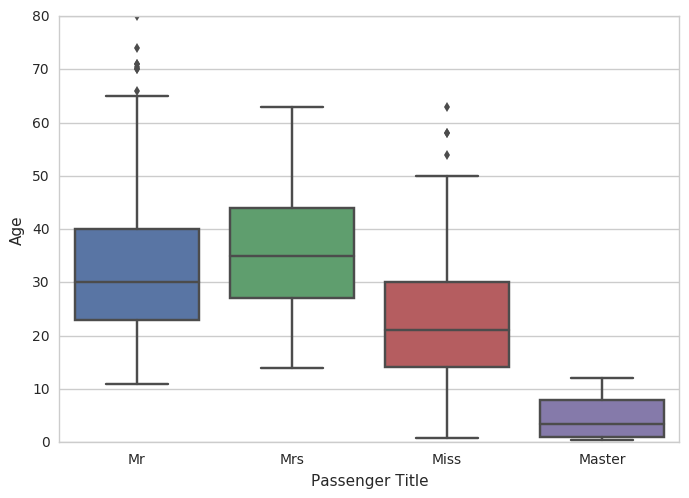

In [15]:
# Draw nested boxplot to show age by title
sns.boxplot(x='TitleS', y='Age', data=titanic_df)
plt.xlabel('Passenger Title')
plt.ylabel('Age')
plt.show()

 We can see how well the titles predict age by printing a boxplot to summarize the features of quantitative variables (outliers, max/min, upper/lower quartiles, and median).


### 2.4. Cleaning Age by creating 'Man, Woman, Child' category


In the boxplot above we can essentially see the Victorian era's definition of child and adult. This could be beneficial to isolate in order to predict Titanic survival; rather than the numeric value of someone's actual age. 

Now the passengers have been isolated into the four common titles of sex and age; Mr, Mrs, Miss, Master. So now, even though we do not have all the values filled in the 'Age' column; we do have some sort of column that can be used to predict age. So, I want to create another column ['MWC'] that dictates whether a passenger is a man, woman, or child.

Finding the men and women is simple. All those passengers with 'Mr' or 'Mrs' as their title would be considered Men or Women during the Titanic era. Finding male children is also simple; those with the title of 'Master' are male children. 

Finding female children is the difficult part; as the title of 'Miss' has quite the spread. In order to do the best attempt at classifying these Misses into Women or Children, this requires a bit of research into Victorian ages. Most historical research related to The Titanic  describe children as those 14 years of age and younger. So we will use that age. Notice, that this is very close to the lower quartile of the 'Miss' category in the boxplot above.

In [16]:
# Create new 'MWC' column to store Man, Woman, Child descriptions
titanic_df['MWC'] = titanic_df['TitleS']
# Replace 'Mr' with 'Man'
titanic_df['MWC'] = titanic_df['MWC'].replace('Mr', 'Men')
# Replace 'Mrs' with 'Woman'
titanic_df['MWC'] = titanic_df['MWC'].replace('Mrs', 'Women')
# Replace 'Master' with 'Child'
titanic_df['MWC'] = titanic_df['MWC'].replace('Master', 'Children')
# Replace Misses with value in Age 14 and lower with 'Child'
titanic_df['MWC'] = titanic_df['MWC'].replace(titanic_df['MWC'].loc[(titanic_df.Age <= 14) &
                                                                    (titanic_df.MWC == 'Miss')], 'Children')
# Replace Misses with value in Age higher than 14 with 'Woman'
titanic_df['MWC'] = titanic_df['MWC'].replace(titanic_df['MWC'].loc[(titanic_df.Age > 14) &
                                                                    (titanic_df.MWC == 'Miss')], 'Women')
# Print MWC stats
print titanic_df['MWC'].value_counts()
print ''
print titanic_df['MWC'].describe()

Men         537
Women       241
Children     77
Miss         36
Name: MWC, dtype: int64

count     891
unique      4
top       Men
freq      537
Name: MWC, dtype: object


So now we have done the bulk of the work in dividing the passengers into the category of Man, Woman, or Child. Every title has been accounted for except for some still recorded as 'Miss'. These are the female passengers with the title of Miss who have an unknown Age. Here we will need to predict their age using the information we have available with the original Misses data. Let's get some statistical information from the 'Miss' passengers:

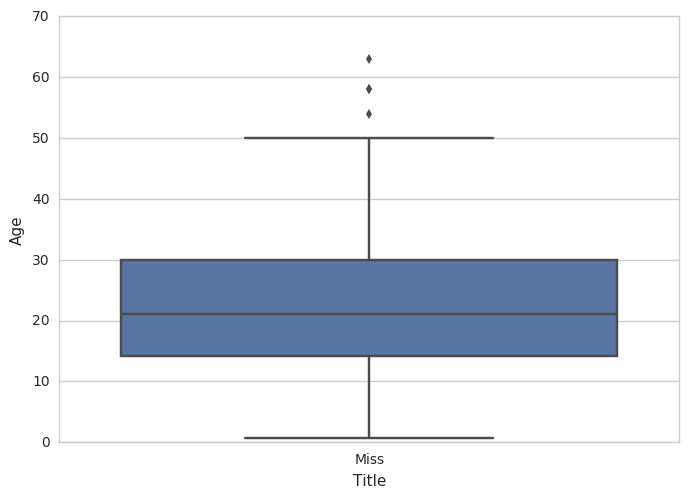

Misses Age Stats:
count    146.000000
mean      21.773973
std       12.990292
min        0.750000
25%       14.125000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64


In [17]:
# Draw nested boxplot to show age of Misses
sns.boxplot(x=titanic_df['TitleS'].loc[(titanic_df.TitleS == 'Miss')], y='Age', data=titanic_df)
plt.xlabel('Title')
plt.ylabel('Age')
plt.show()
print 'Misses Age Stats:'
print titanic_df[(titanic_df['TitleS'] == 'Miss')].Age.describe()

The above information gives us the statistical information of the Misses in the Titanic dataset. The above statistics are graphically represented in the box plot above, but we need the actual values. It would be simple to just replace the missing age values with the mean, but that would automatically make all those leftover Misses a Woman. Could we do something better? How about we recreate the above Age statistics. Then we'll use those values to predict whether those Misses are women or children.

[ 8  4 13 15 37 20 28 29  8 21 22 29 22 25 13  8 27 31 21 16 26 20 21 21  9
 35 22 25 15 16 21 33 19 15 36 24]


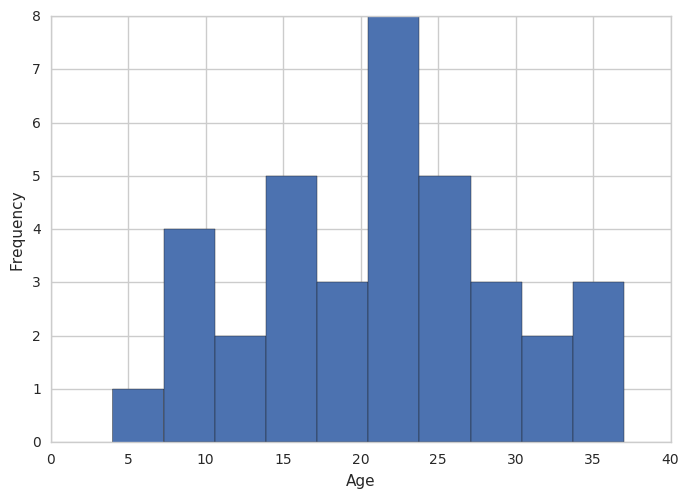

In [18]:
# Use Gaussian random number generator to create a series of numbers based on Misses Age statistics
# loc = mean of Misses Age, scale = std of Misses Age, size= number of Misses missing Age
# astype(int) to convert normally generated floats into int
random_misses = (np.random.normal(loc=titanic_df[(titanic_df['TitleS'] == 'Miss')].Age.mean(), 
                                  scale=titanic_df[(titanic_df['TitleS'] == 'Miss')].Age.std(), 
                                  size=len(titanic_df[(titanic_df['MWC'] == 'Miss') & 
                                                      (pd.isnull(titanic_df['Age']) == True)])).astype(int))
print random_misses
plt.hist(random_misses)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Above you can see the randomly generated integers based on the original statistics. The plot shows that these new numbers looks pretty close to a random normal distribution, so we will preceed with replacing the Misses with missing ages with this series:

**NOTE:** Mathematically speaking,  it's not always possible to have a gaussian random normal generator come up with only positive values. Also, mathetmatically speaking the generator generates floats. I converted these floats to ints so the fractions of a number are ignored. Converting the floats to ints is not 100% mathematically acurate; but for this excersize it will still work great. _You can refresh the above cell until you get a destribution you like or just use whatever is generated first._

In [19]:
# Replace NaN Age values of Misses with random sample
titanic_df.loc[titanic_df['MWC']=='Miss','Age'] = random_misses
# Replace Misses with value in Age 14 and lower with 'Child'
titanic_df['MWC'] = titanic_df['MWC'].replace(titanic_df['MWC'].loc[(titanic_df.Age <= 14) &
                                                                    (titanic_df.MWC == 'Miss')], 'Children')
# Replace Misses with value in Age higher than 14 with 'Woman'
titanic_df['MWC'] = titanic_df['MWC'].replace(titanic_df['MWC'].loc[(titanic_df.Age > 14) &
                                                                    (titanic_df.MWC == 'Miss')], 'Women')
# Print MWC stats
print titanic_df['MWC'].value_counts()
print ''
print titanic_df['MWC'].describe()

Men         537
Women       270
Children     84
Name: MWC, dtype: int64

count     891
unique      3
top       Men
freq      537
Name: MWC, dtype: object


The above stats show all Titanic passengers in the dataset have been given a classification of Man, Woman, or Child. We can now use this column to represent both Sex and Age from this point forward. Thus, we will abstain from using the numerical value of Age for the remainder of this analysis.

## 3. Browsing the Data

Before we can see if any factors contribute to surviving the Titanic disaster; we'll explore the data. In this stage of the data analysis process we are looking for **trends**; not values.

### 3.1. Browsing the Data: Passenger Class

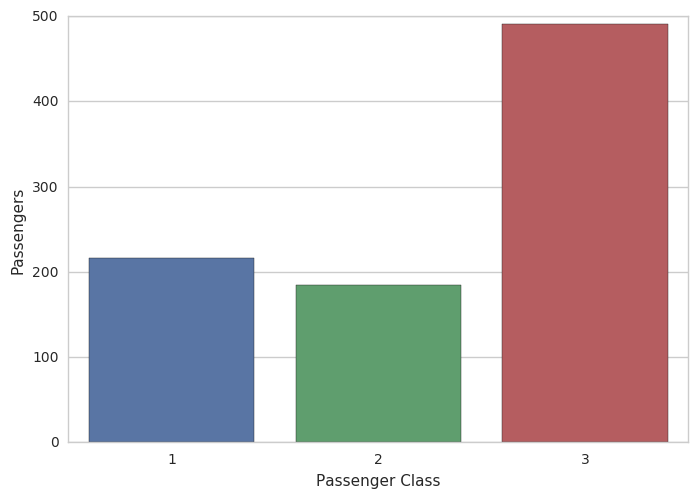

In [20]:
# Titanic passneger class distribution
sns.countplot(x='Pclass', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Passengers')
plt.show()

Here you can see  a histogram of how many passengers were in each class. First class and second class had about the same number of people, however third class had more than double the amount of passengers than first or second class

First class list was a "who's who" of the rich and prominent of the upper class.

Second class' passengers were leisure tourists, academics, members of the clergy and middle class English and American families.

The third class (or steerage) passengers left hoping to start new lives in the United States and Canada.

Titanic passenger class was  also an indicator of socio-economic status.

### 3.2. Browsing the Data: Sex and Age

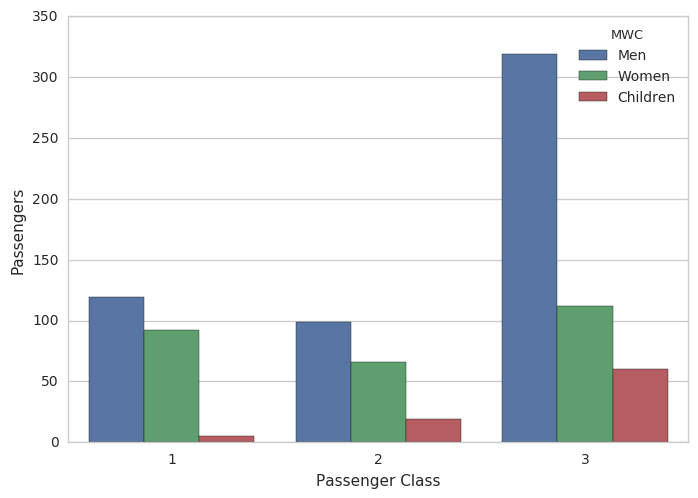

In [21]:
# Plot showing distribution of men, women, and children by passenger class
sns.countplot(x='Pclass', hue='MWC', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Passengers')
plt.show()

The plot above shows the density of men, women, and children in the different passenger classes. The amount of men and women is nearly the same on first and second class. However, third class has many more men than woman and children. Since third class passengers were mostly immigrants searching for a new life, it would make sense that there could be more 'single men' off to America to start a new life. Most of these passengers purchased third class tickets.

### 3.3. Browsing the Data: Family Relationships-Parents/Children

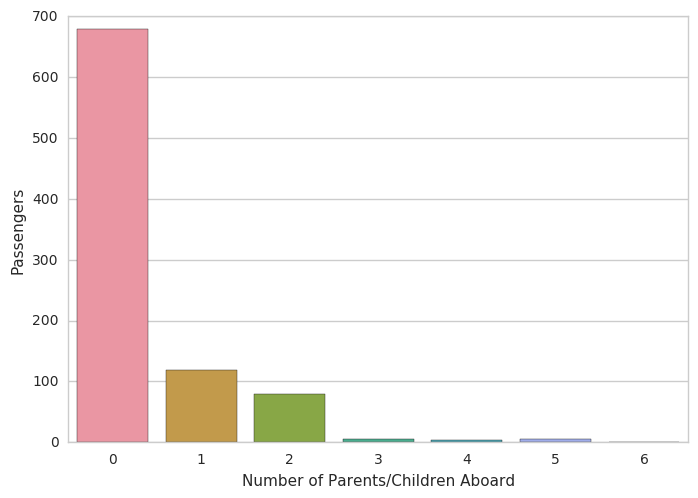

In [22]:
# Plot showing counts of PArch category
sns.countplot(x='Parch', data=titanic_df)
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Passengers')
plt.show()

The Titanic Data has the column 'Parch' to show family relationship by identifyin the number of parents/children aboard. As you can see, the high quantity of '0' passengers indicates that the majority of Titanic passengers were traveling alone without a family or relatives.

### 3.4. Browsing the Data: Family Relationships-Siblings/Spouse

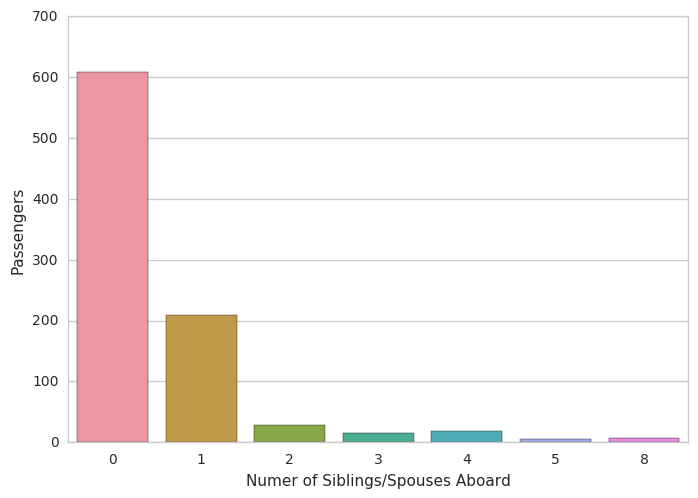

In [23]:
# Plot showing counts of SibSp column
sns.countplot(x='SibSp', data=titanic_df)
plt.xlabel('Numer of Siblings/Spouses Aboard')
plt.ylabel('Passengers')
plt.show()

The Titanic Data has the column 'SibSP' to define family relationships as well. This column indicates the number of siblings/spouses aboard. The visualition above also indicates that the majority of passengers were traveling alone without family or relatives. The second largest column of '1' would indicates that there was quite a bit of family 'pairs' on board; meaning husband/wife or sibling/sibling.

### 3.5. Browsing the Data: Port of Embarkation

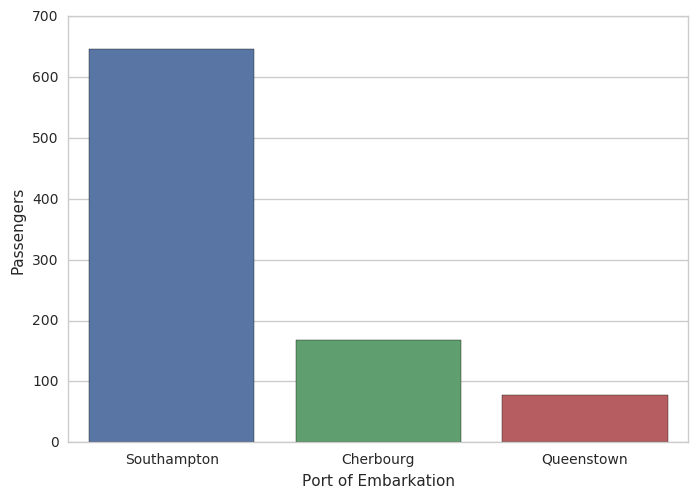

In [24]:
# Plot showing counts of embarked column
sns.countplot(x='Embarked', data=titanic_df)
plt.xlabel('Port of Embarkation')
plt.ylabel('Passengers')
plt.show()

The plot above shows the count of those from each Port of Embarkation. This plot shows the majority of passengers embarked from Southhampton.

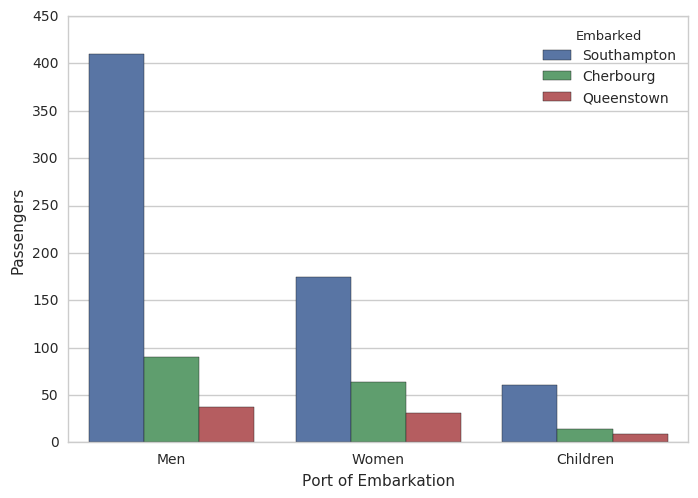

In [25]:
# Plot countplot of Sex by Embarked
sns.countplot(x='MWC', hue='Embarked', data=titanic_df)
plt.xlabel('Port of Embarkation')
plt.ylabel('Passengers')
plt.show()

The above plot shows that a majority of those who embarked from Southampton were men.

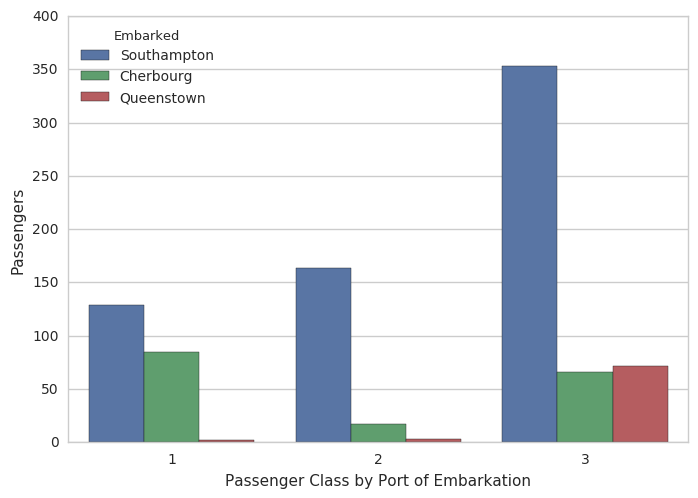

In [26]:
# Plot countplot of PClass by Embarked
sns.countplot(x='Pclass', hue='Embarked', data=titanic_df)
plt.xlabel('Passenger Class by Port of Embarkation')
plt.ylabel('Passengers')
plt.show()

The above plot really doesn't show anything conclusive.

### 3.6. Browsing the Data: Deck

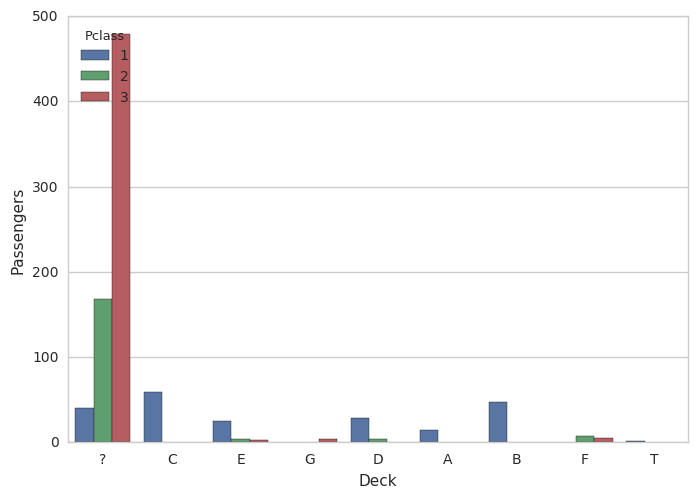

In [27]:
# Plot showing counts of Decks by Pclass column
sns.countplot(x='Deck', hue='Pclass', data=titanic_df)
plt.xlabel('Deck')
plt.ylabel('Passengers')
plt.show()

The above count plot shows the number of passengers with a deck assignment by passenger class. You can see that the majority of passengers with available deck assignments are first class passengers.

It also clearly shows that an overwelming majority of second and third class had no known Deck assignment. This could possibly be because second and third class passengers really did not have a staff to service them; this the Titanic really didn't need to know where their cabin was located.

### 3.7. Browsing the Data: Fare

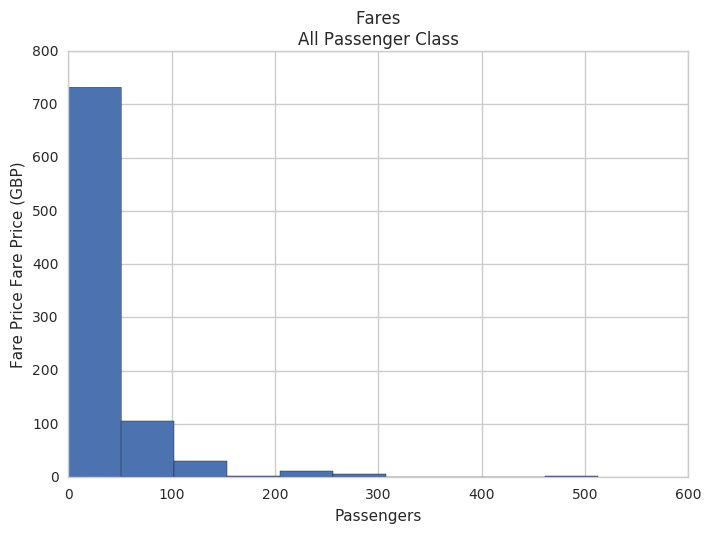

In [28]:
titanic_df.Fare.plot(kind='hist', title='Fares\nAll Passenger Class')
plt.xlabel('Passengers')
plt.ylabel('Fare Price Fare Price (GBP)')
plt.show()

The above histogram of fares paid by passengers is not very conclusive, but it does show that a small portion of the titanic passengers paid an exorbanent fare for their tickets; while the rest of the passengers paid significantly less. Let's try to break this down by passenger class to get a better picture.

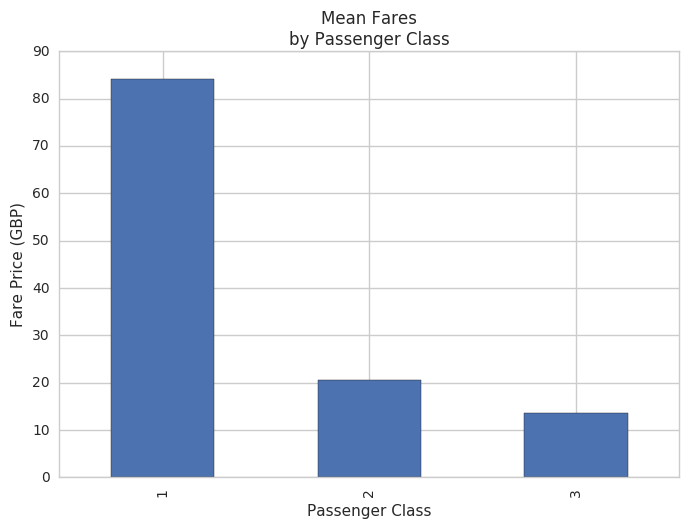

In [29]:
# Plot showing the mean fare price of each passenger class
titanic_df.groupby('Pclass').Fare.mean().plot(kind='bar', title='Mean Fares\nby Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare Price (GBP)')
plt.show()

The above bar chart shows the mean price passengers paid per passenger class. It is no surprise that first class paid more money than second and third class passengers. However, first class paid **much** More money for their tickets than second/third classes. Also, second and third class fare prices are more similar in price as compared to the _very high_ first class fares.

This seems to confirm with the notion that Titanic passenger class was truly a proxy for socio-economic status. It is especially a reflection of the socio-economic patterns in the Guilded Age.

Since the fare price is already reflected by the passenger class as a measure of socio-econoimic status; we will abstain from using fare for the remainder of this analysis.

## 4. Exploring the Data: Survivalship

In this section, survialship will be presented across a the properties of the Titanic passengers available in the dataset. We'll do this by grouping  the different columns in the dataset by the mean of the survivorship column. Since the survivorship column is essentially a boolean variable with 0=victim and 1=survivor; a mean of those values would be a probability of survivorship.

Most of the visualiations will have the probability on the Y-axis (1=100%, 0.5=50%, .21=21%, etc).

### 4.1. Exploring the Data: Survivalship by Passenger Class

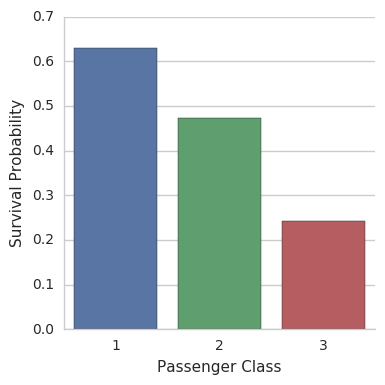

In [30]:
# Plot showing rates of survivals of Pclass
sns.factorplot(x='Pclass', y='Survived', data=titanic_df, kind='bar', ci=None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.show()

The plot above shows distribution of survivlship based on passenger class.  First class had the highest survivalship density, followed by second class, then third class. This could possibly be due to the much higher density of males in third class than females.

### 4.2. Exploring the Data: Survivalship by Sex and Age

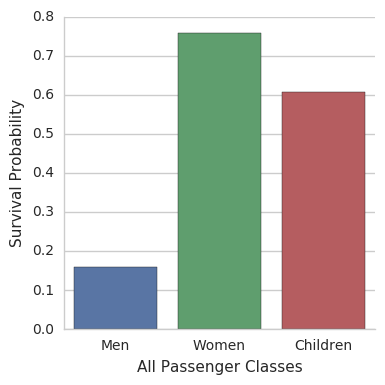

In [31]:
# Plotting survivalship of MWC
sns.factorplot(x='MWC', y='Survived', data=titanic_df, kind='bar', ci=None)
plt.xlabel('All Passenger Classes')
plt.ylabel('Survival Probability')
plt.show()

The above plot shows females and children had a **much** higher survivalship probability than males. 

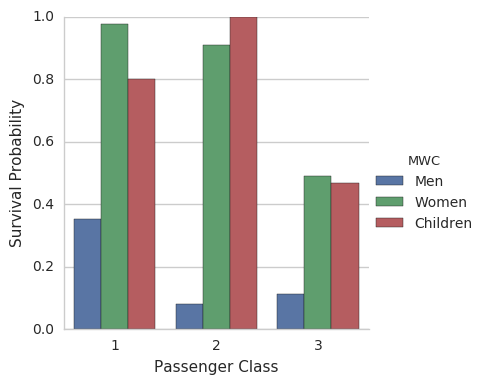

In [32]:
# Plot survivalship of MWC by Pclass
sns.factorplot(x='Pclass', y='Survived', hue='MWC', data=titanic_df, kind='bar', ci=None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.show()

The above plot shows that in all three passenger classes; men and women had a fairly equal chance of survival. Men had a decent of survival in the first class section, but a poor chance of survival in the second and third classes.

### 4.3. Exploring the Data:  Survivalship by Family Relationships-Parents/Children

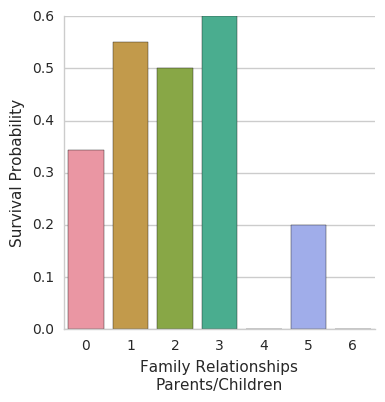

In [33]:
# Plot rate of survival of Parch
sns.factorplot(x='Parch', y='Survived', data=titanic_df, kind='bar', ci=None)
plt.xlabel('Family Relationships\nParents/Children')
plt.ylabel('Survival Probability')
plt.show()

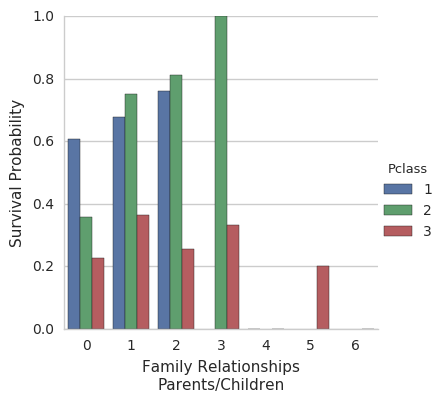

In [34]:
# Plot rate of survival of Parch by Pclass
sns.factorplot(x='Parch', y='Survived', hue='Pclass', data=titanic_df, kind='bar', ci=None)
plt.xlabel('Family Relationships\nParents/Children')
plt.ylabel('Survival Probability')
plt.show()

We can see in the visualitions that there seems to be a slight advantage of those who traveled with a family as indicated by any integer above zero (zero indicates the traveler is traveling alone). However, the survivalship of families by Parents/Children seems to also correlate with passenger class; especially in the first and second classes.

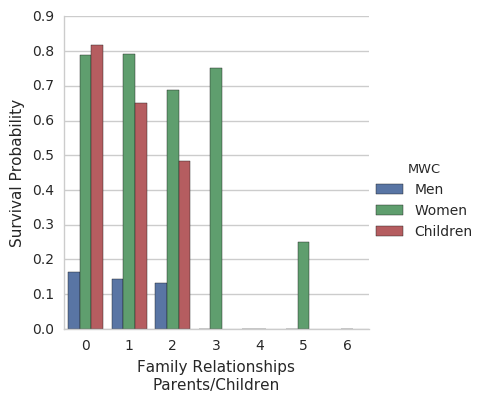

In [35]:
# Plot rate of survival of Parch by MWC
sns.factorplot(x='Parch', y='Survived', hue='MWC', data=titanic_df, kind="bar", ci=None)
plt.xlabel('Family Relationships\nParents/Children')
plt.ylabel('Survival Probability')
plt.show()

In the above visualiation, we see that the reason for such high rates of survival in this category is due to the classification of men, women, and children. Men still have very low rates of survivalship; whereas women and children are quite high.

It appears that the survivalship of Family Relationships-Parents/Children is reflected by whether the passenger is a man, woman, or child followed by their passenger class. Thus, we will abstain from using Parents/Children data for the remainder of the analysis.

### 4.4. Exploring the Data:  Survivalship by Family Relationships-Siblings/Spouse

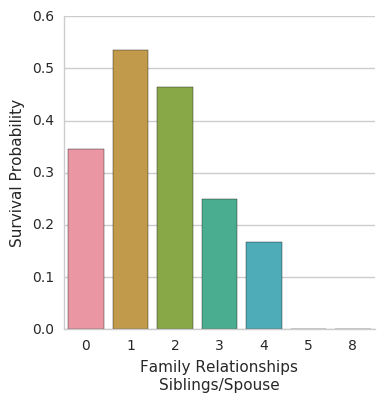

In [36]:
# Plot rate of survival of SibSp
sns.factorplot(x='SibSp', y='Survived', data=titanic_df, kind='bar', ci=None)
plt.xlabel('Family Relationships\nSiblings/Spouse')
plt.ylabel('Survival Probability')
plt.show()

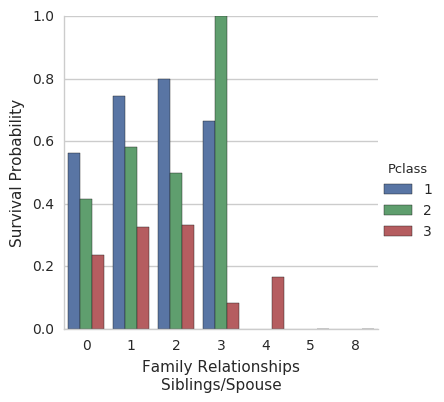

In [37]:
# Plot rate of survival of SibSp by Pclass
sns.factorplot(x='SibSp', y='Survived', hue='Pclass', data=titanic_df, kind="bar", ci=None)
plt.xlabel('Family Relationships\nSiblings/Spouse')
plt.ylabel('Survival Probability')
plt.show()

Like with the Parch category, we can see in the above visualitions that there seems to be an advantage of those who traveled with a spouse or siblings as indicated by any integer above zero (zero indicates the traveler is traveling alone). However, a further advantage is given to those in first class.

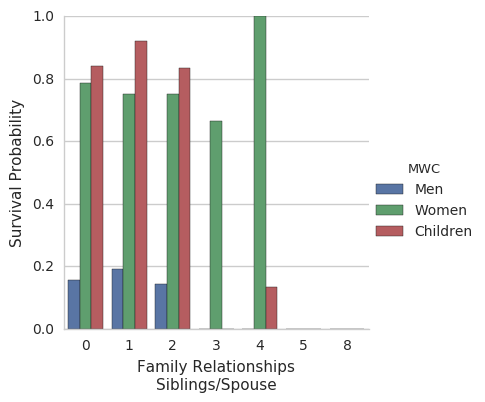

In [38]:
# Plot rate of survival of SibSp by MWC
sns.factorplot(x='SibSp', y='Survived', hue='MWC', data=titanic_df, kind='bar', ci=None)
plt.xlabel('Family Relationships\nSiblings/Spouse')
plt.ylabel('Survival Probability')
plt.show()

In the above visualiation, we see that the reason for such high rates of survival in this category is due to the classification of men, women, and children. Men still have very low rates of survivalship; whereas women and children are quite high. This is very similar to the visualtion above showing survivalship based on Parents/Children.

It appears that the survivalship of Family Relationships-Sibling/Spouse is reflected by whether the passenger is a man, woman, or child followed by their passenger class. Thus, we will abstain from using Sibling/Spouse data for the remainder of the analysis.

### 3.5. Exploring the Data: Survivalship by Port of Embarkation

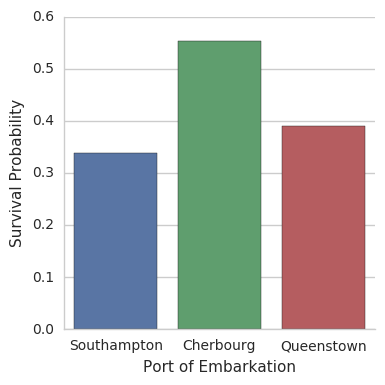

In [39]:
# Plot rate of survival of Embarked
sns.factorplot(x='Embarked', y='Survived', data=titanic_df, kind='bar', ci=None)
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Probability')
plt.show()

The above bar plot shows survivalship based on Port of Embarkation. Earlier we saw that a majority of passengers embkared from Southampton.  Those passengers originating from Southahmpton also had the least likely probability of survival.

However, how much correlation is there with Port of Embarkation with survivalship? Or is it coincidence? Let's group this data with other passenger data:

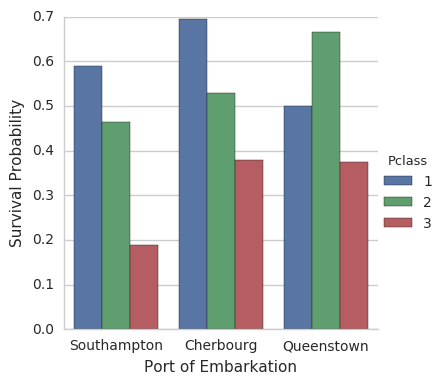

In [40]:
# Plot rate of survival of Embarked by Pclass
sns.factorplot(x='Embarked', y='Survived', hue='Pclass', data=titanic_df, kind='bar', ci=None)
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Probability')
plt.show()

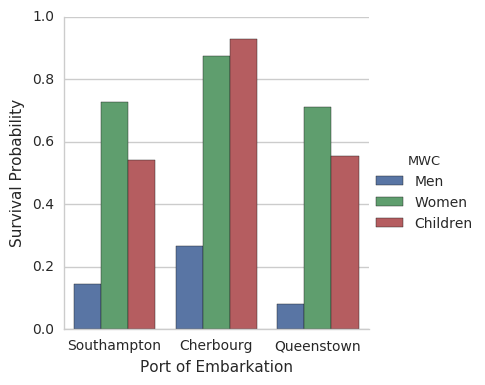

In [41]:
# Plot rate of survival of Embarked by MWC
sns.factorplot(x='Embarked', y='Survived', hue='MWC', data=titanic_df, kind="bar", ci=None)
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Probability')
plt.show()

The above two bar charts show survial probabilities by grouping the Port of Embarkation data  with passenger class and sex, respectively. This shows that Port of Embarkation is not so much a distinctive basis of survival; as the data shows survivalship is still very much dependent upon passenger class, and sex. Women and children and 'higher' class passengers have a greater chance of survival regardless of Port of Embarkation. Thus, we will abstain from using Port of Embarkation data for the remainder of the analysis.

### 3.6. Exploring the Data: Survivalship by Deck

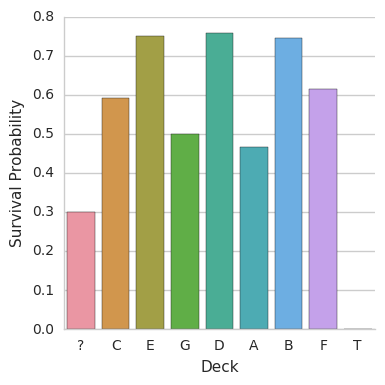

In [42]:
# Plot rate of survival of Deck
sns.factorplot(x='Deck', y='Survived', data=titanic_df, kind="bar", ci=None)
plt.xlabel('Deck')
plt.ylabel('Survival Probability')
plt.show()

The above chart shows that the deck a passenger was assigned didn't have a significant affect of survival. However, notice that the passengers with no known decks had significantly lower survival rates. Let's explore a little more 

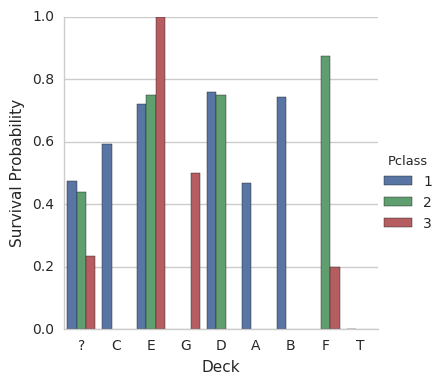

In [43]:
# Plot rate of survival of Deck by Pclass
sns.factorplot(x='Deck', y='Survived', hue='Pclass', data=titanic_df, kind="bar", ci=None)
plt.xlabel('Deck')
plt.ylabel('Survival Probability')
plt.show()

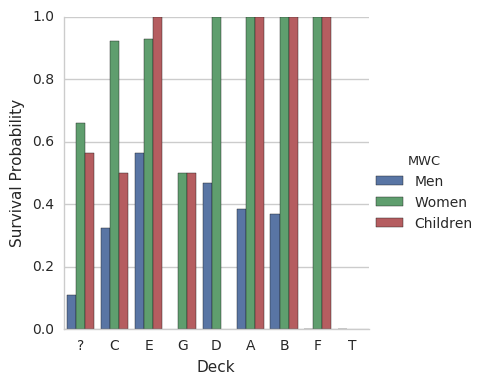

In [44]:
# Plot rate of survival of Deck by MWC
sns.factorplot(x='Deck', y='Survived', hue='MWC', data=titanic_df, kind="bar", ci=None)
plt.xlabel('Deck')
plt.ylabel('Survival Probability')
plt.show()

It looks like the Deck a passenger was assigned to didn't play a significant role in survivalship because that survivalship is already represented by whether or a not a person was a man, woman, child or by their passenger class. Thus, we will abstain from using dock data for the remainder of the analysis.

### 4.7. Exploring the Data: Survivalship by Fare

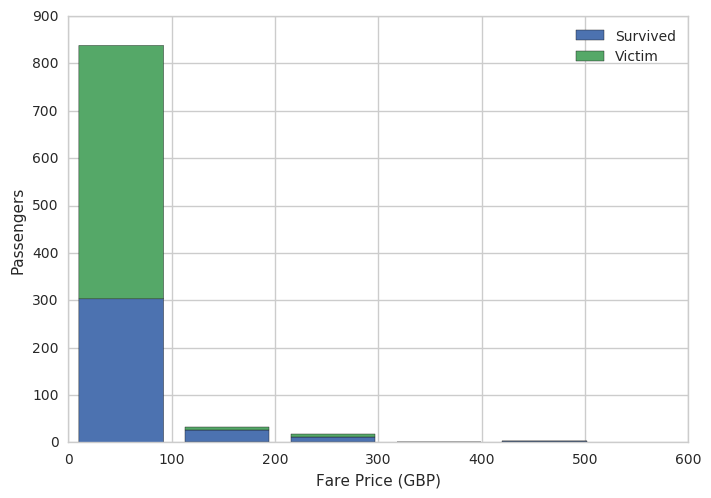

In [45]:
# Plot histogram of survivalship by fare
plt.hist([titanic_df[titanic_df['Survived']==1]['Fare'], titanic_df[titanic_df['Survived']==0]['Fare']], 
         stacked=True, bins = 5,label = ['Survived','Victim'])
plt.xlabel('Fare Price (GBP)')
plt.ylabel('Passengers')
plt.legend()
plt.show()

Although it is difficult to see; the above histogram shows  that those who paid a higher fare had a higher probability of survival. That is no surprise; as fare price directly relates with passenger class. Thus, we will abstain from using fare data for the remainder of the analysis.

## 5. Hypthesis

It appears that the greatest chance of surviving the titanic  is dependent upon two main factors; sex and passenger class _(Pclass)_. Age also shows it could be a factor in survivalship, but only when age is simply child vs. adult. Also, as we saw far above in the .info function, not all passengers in the dataset have an Age. It would be quite convoluted and suspcious to make concrete  analysis based on a passenger property that is not complete. 

_Thus, it's good to be female or it's good to be a first class passenger. But it's even better to be a first class paseenger **and** a child._

## 6. Data Analysis

In this section, the data will be more formally analyzed and the hyptheses will be tested. A function will be created that passes the passenger's class and whether the person is a man, woman, or child. It then returns the estimated probability of survival.

In [46]:
# Function to calculate survival probability based on PClass and MWC
def pclass_mwc_survive(pclass, mwc):
    num_pclass_mwc_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                          (titanic_df['Pclass'] == pclass) & (titanic_df['MWC'] == mwc)])
    num_pclass_mwc_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                         (titanic_df['Pclass'] == pclass) & (titanic_df['MWC'] == mwc)])
    num_pclass_mwc = len(titanic_df[(titanic_df['Pclass'] == pclass) & (titanic_df['MWC'] == mwc)])
    percent_pclass_mwc_victim = (float(num_pclass_mwc_victim) / float(num_pclass_mwc)) * 100
    percent_pclass_mwc_survive = (float(num_pclass_mwc_survive) / float(num_pclass_mwc)) * 100
    return percent_pclass_mwc_survive

In [47]:
# Loop thru function to calculate all Pclass and MWC survival probabilities
results_df = pd.DataFrame(index=sorted((titanic_df['Pclass'].unique()).tolist()), 
                          columns=sorted((titanic_df['MWC'].unique()).tolist()))
for i in titanic_df['Pclass'].unique():
    for j in titanic_df['MWC'].unique():
        results_df.loc[i,j] = pclass_mwc_survive(i, j)
results_df

,Children,Men,Women
1,80,35.2941,97.8261
2,100,8.08081,90.9091
3,46.6667,11.2853,49.1071


## 7. Conclusions: Your Personalized Survival Chances

The above data shows that chances of survival increases as the passenger class increases. Also within each class, children, followed by women and men, have the highest probability of survival.

So, now let's create a function that takes age, sex, and income (socio-economi-status) and passes an estimation of the user's survival probability.

The user will know their age and sex, but they will have to decide what kind of ticket they want to purchase. Here's a description of each classes:

**First-Class Suites and Cabins:** First-class accommodations were located amidships, where the rocking of the ship was less keenly felt and passengers were less likely to get seasick. They were decorated opulently in different period styles: Queen Anne, Louis XVI, and Georgian. The parlor suites came with wardrobe rooms, private baths, and in some cases, private promenades. All first-class accommodations were equipped with telephones, heaters, special gimbal lamps that were designed not to tip over in choppy seas, table fans, and (of course) call bells for summoning the steward.

**Second-Class Cabins:** In second class, passengers slept in berths built into the walls of the cabins. At two to four berths per cabin, privacy was hard to come by, although a passenger could close the curtain around his or her berth. Each second-class cabin had a washbasin and a chamber pot to be used in case of seasickness. Second-class passengers used communal bathrooms. This figure shows a drawing of the comfy, homelike atmosphere of a second-class cabin.

**Third Class Cabins:** Third-class passengers slept on bunk beds in crowded quarters at six to a narrow cabin. Like second-class passengers, they shared bathrooms, but the number of people sharing a bathroom was much higher in third class: Only two bathtubs were available for all 710 third-class passengers, one for the men and one for the women.

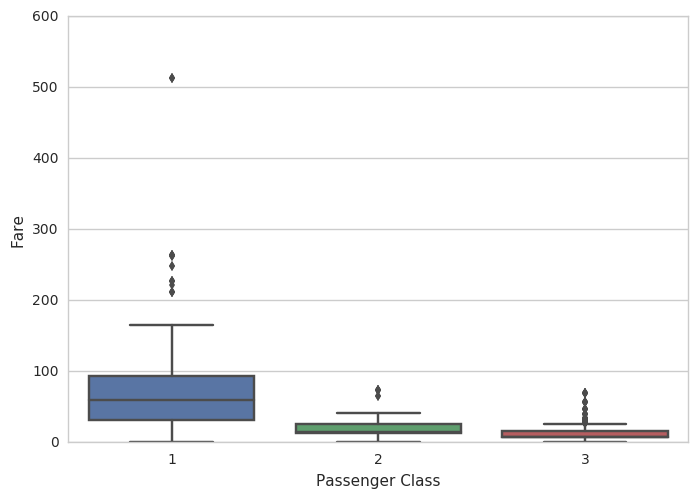

,Fare
Pclass,
1,84.15
2,20.66
3,13.68


In [48]:
# Draw nested boxplot to show age by title
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()
# Print mean fares of titanic classes
meanfares_df = pd.DataFrame(titanic_df.groupby('Pclass').Fare.mean().round(2))
meanfares_df

The dataframe mask above shows the average fares people paid in each class. But what good is that? Those are Great British Pounds (£) from a bygone era. We need to figure out what it would cost today in US Dollars ($). To do this we'll check the Bank of England's website to find the average inflation rate between 1912 and 2016: 4.6% a year. Next we will convert the Great British Pounds to US Dollars.

In [49]:
# Function to calculate inflation and convert to USD
def inflation_exchange(meanfare):
#    fare = avgfare
    cycles = 0
    years = 2016 - 1912
    while cycles < years:
        meanfare = meanfare + (meanfare*.046)
        cycles += 1
    fare_convert = meanfare * 1.3
    return fare_convert

In [50]:
# Loop thru meanfares and adjust for inflation and then convert from £ to $
convertfares_df = pd.DataFrame(index=sorted((titanic_df['Pclass'].unique()).tolist()), columns=['Fare'])
for index, row in meanfares_df.iterrows():
    convertfares_df.loc[index] = inflation_exchange(row['Fare'])
convertfares_df

,Fare
1,11756.9
2,2886.48
3,1911.28


The dataframe above now gives the modern day mean fare prices for each class in USD ($).

Now people can decide what passenger class ticket to buy.

In [53]:
# Function to pass user's desired passenger class, their sex, and their age
# Returns their survival probability
def personalized_survival_chances(pclass, sex, age):
    if (sex == 'male') & (age > 14):
        mwc = 'Men'
    elif (sex == 'female') & (age > 14):
        mwc = 'Women'
    else:
        mwc = 'Children'    
    return results_df.ix[pclass, mwc]
print 'Your personal rate of Titanic survival is:', personalized_survival_chances(3, 'male', 34), '%'
print 'Your personal rate of Titanic survival is:', personalized_survival_chances(1, 'female', 12), '%'
print 'Your personal rate of Titanic survival is:', personalized_survival_chances(3, 'female', 34), '%'

Your personal rate of Titanic survival is: 11.2852664577 %
Your personal rate of Titanic survival is: 80.0 %
Your personal rate of Titanic survival is: 49.1071428571 %


## Sources

https://matplotlib.org/1.5.3/index.html

https://pandas.pydata.org/pandas-docs/stable/

https://github.com/jp-wright/dating_data

https://github.com/zipfian/python-fundamentals

https://en.wikipedia.org/wiki/RMS_Titanic

https://matplotlib.org/users/legend_guide.html

https://seaborn.pydata.org/generated/seaborn.countplot.html

http://pbpython.com/simple-graphing-pandas.html

http://www.r-graph-gallery.com/portfolio/boxplot/

http://www.dummies.com/education/history/suites-and-cabins-for-passengers-on-the-titanic/

http://www.bankofengland.co.uk/education/Pages/resources/inflationtools/calculator/default.aspx